# CS105 Final Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.cluster import KMeans 

Read data in from json file

In [3]:
reviews = pd.read_json('reviews_Amazon_Instant_Video_5.json', lines=True)
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009"


Distribution of star ratings 

<AxesSubplot:>

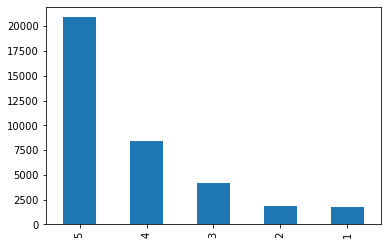

In [6]:
reviews['overall'].value_counts().plot(kind='bar')

Create cdf for bag of words model

In [178]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', min_df=100)

cdf = vectorizer.fit_transform(reviews['reviewText'])

Print out vocabulary for bag of words model

In [179]:
vectorizer.get_feature_names_out()

array(['10', '100', '11', ..., 'younger', 'zombie', 'zombies'],
      dtype=object)

Turn cdf into bag of words matrix

In [180]:
bag = pd.DataFrame(cdf.toarray(), columns=vectorizer.get_feature_names_out())
bag

,10,100,11,12,13,14,15,16,18,1st,...,wrote,yeah,year,years,yes,york,young,younger,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
37124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split data into testing set(20%) and training set(80%)

In [181]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

x = bag.values
y = reviews['overall'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Create the Multi-layer perceptron regressor

In [182]:
mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
print(1)

1


Train our multi-layer perceptron on the training data

In [183]:
mlp.fit(x_train, y_train)
print(1)

1


Predict the values of testing and training reviews using our multi-layer perceptron

In [184]:
predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

Error values on training set

In [185]:
from sklearn.metrics import classification_report,confusion_matrix
print('Mean absolute error: ', sum(abs(y_train - predict_train))/len(y_train))
print('Mean squared error: ', sum((y_train - predict_train) * (y_train - predict_train))/len(y_train))

Mean absolute error:  0.2409802405183146
Mean squared error:  0.12842344467704572


Error values on testing set

In [186]:
print('Mean absolute error: ', sum(abs(y_test - predict_test))/len(y_train))
print('Mean squared error: ', sum((y_test - predict_test) * (y_test - predict_test))/len(y_train))

Mean absolute error:  0.21366197835232542
Mean squared error:  0.4508580806963394


Two examples of running the Multi-layered perceptron neural network on random amazon reviews not included in the dataset

In [218]:
example = 'I have pain under my bridge and two broken teeth I can\'t afford to fix! This product helps me deal with it by getting rid of the trapped food several times a day! This deal made it easier to buy this year! Thank you'
rating = 5
analyze = vectorizer.build_analyzer()
exampleDF = pd.DataFrame(index = range(1), columns=vectorizer.get_feature_names_out()).fillna(0)
for word in analyze(example):
    if word in exampleDF.columns:
        exampleDF[word]+=1

predict_example = mlp.predict(exampleDF.values)
print('Review: ', example)
print('Actual rating: ', rating)
print('Predicted rating: ', predict_example[0])
print('Difference between actual rating and predicted value: ', rating - predict_example[0])

Review:  I have pain under my bridge and two broken teeth I can't afford to fix! This product helps me deal with it by getting rid of the trapped food several times a day! This deal made it easier to buy this year! Thank you
Actual rating:  5
Predicted rating:  4.497519848311534
Difference between actual rating and predicted value:  0.5024801516884656


In [223]:
example = 'Could be a little less expensive since it seems the refurbished mice tend to be a tad problematic. They will replace the mouse if there is a problem, just a hassle. Otherwise I love the mouse itself.'
rating = 3
analyze = vectorizer.build_analyzer()
exampleDF = pd.DataFrame(index = range(1), columns=vectorizer.get_feature_names_out()).fillna(0)
for word in analyze(example):
    if word in exampleDF.columns:
        exampleDF[word]+=1

predict_example = mlp.predict(exampleDF.values)
print('Review: ', example)
print('Actual rating: ', rating)
print('Predicted rating: ', predict_example[0])
print('Difference between actual rating and predicted value: ', rating - predict_example[0])

Review:  Could be a little less expensive since it seems the refurbished mice tend to be a tad problematic. They will replace the mouse if there is a problem, just a hassle. Otherwise I love the mouse itself.
Actual rating:  3
Predicted rating:  3.92521563492811
Difference between actual rating and predicted value:  -0.9252156349281102


Difference between review star rating and prediction for first 100 reviews in dataset

In [187]:
for i in range(100):
    print(y_test[i]-predict_test[i])

0.524708016369714
-0.8245142516368631
0.08458198070992307
0.09754391623612868
1.1658495224791259
0.17358743539614263
0.11929276270558287
-0.0021407730322096086
3.20394014686311
0.21338535755437604
-0.630237711229567
0.06838586128504609
0.11418048670211434
1.487948255141791
0.13973392220601522
-1.605218034591255
0.09457611939672184
-0.7485799989090394
-0.9735510169405712
0.8763696590691858
0.5760734951170172
0.1253753920115015
0.4969027624409499
0.2624234025105787
0.05341105090058207
0.9267690419384991
-2.022942888601839
0.28718436322462804
0.1609801023981321
-0.14050997881287497
1.3088432355820347
-1.4434501603194256
-0.7581139403991726
0.4033007533803028
0.21782541651182985
0.372905652215743
-0.7533416754171691
0.12649765752239883
0.05874678715198778
0.5078046602964488
0.27317304243420715
0.12175834897479376
1.058478042675174
0.44632358276397444
-0.6809952177310192
0.21946949341261313
2.5073820731945617
0.2919360449987609
0.2129161268726678
0.3257302306243419
0.021151011129661335
0.54